Import Modul

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Scraping all pages

In [2]:
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
book_data = []

In [3]:
for page in range(1, 51):  # Website punya 50 halaman
    url = base_url.format(page)
    print(f"Scraping {url}")
    res = requests.get(url)
    res.encoding = "utf-8"
    
    if res.status_code != 200:
        print(f"Gagal mengakses {url}")
        continue

    soup = BeautifulSoup(res.text, "html.parser")
    books = soup.select("article.product_pod")

    # Jika tidak ada buku ditemukan, skip
    if not books:
        print(f"Tidak ada buku ditemukan di halaman {page}")
        continue

    for book in books:
        title = book.h3.a["title"]
        price = book.select_one("p.price_color").text
        availability = book.select_one("p.instock.availability").text.strip()
        book_data.append({
            "title": title,
            "price": price,
            "availability": availability
        })

    time.sleep(0.5)

Scraping https://books.toscrape.com/catalogue/page-1.html
Scraping https://books.toscrape.com/catalogue/page-2.html
Scraping https://books.toscrape.com/catalogue/page-3.html
Scraping https://books.toscrape.com/catalogue/page-4.html
Scraping https://books.toscrape.com/catalogue/page-5.html
Scraping https://books.toscrape.com/catalogue/page-6.html
Scraping https://books.toscrape.com/catalogue/page-7.html
Scraping https://books.toscrape.com/catalogue/page-8.html
Scraping https://books.toscrape.com/catalogue/page-9.html
Scraping https://books.toscrape.com/catalogue/page-10.html
Scraping https://books.toscrape.com/catalogue/page-11.html
Scraping https://books.toscrape.com/catalogue/page-12.html
Scraping https://books.toscrape.com/catalogue/page-13.html
Scraping https://books.toscrape.com/catalogue/page-14.html
Scraping https://books.toscrape.com/catalogue/page-15.html
Scraping https://books.toscrape.com/catalogue/page-16.html
Scraping https://books.toscrape.com/catalogue/page-17.html
Scrapi

Step 2: Cleansing

In [4]:
df = pd.DataFrame(book_data)

# Hilangkan karakter selain angka dan titik dari kolom harga
df["price"] = df["price"].apply(lambda x: re.sub(r"[^\d.]", "", x)).astype(float)

# Bersihkan kolom availability
df["availability"] = df["availability"].str.lower().str.replace("\n", "").str.strip()

In [5]:
print(df.to_string(index=False))

                                                                                                                                                                                                       title  price availability
                                                                                                                                                                                        A Light in the Attic  51.77     in stock
                                                                                                                                                                                          Tipping the Velvet  53.74     in stock
                                                                                                                                                                                                  Soumission  50.10     in stock
                                                                                                    

In [6]:
print(f"\nTotal buku ditemukan: {len(df)}")


Total buku ditemukan: 1000


Step 3: Save to Excel

In [7]:
df.to_excel("books_allpages.xlsx", index=False)

Step 4: Visualisasi

C:\Users\user\AppData\Local\Temp\ipykernel_25856\780742790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="availability", data=df, palette="viridis")


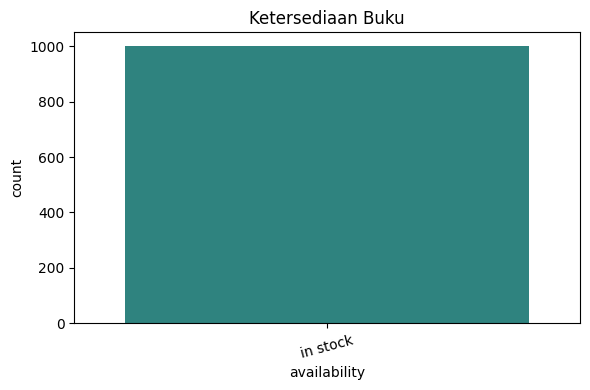

In [8]:
# a. Jumlah buku tersedia vs tidak
plt.figure(figsize=(6, 4))
sns.countplot(x="availability", data=df, palette="viridis")
plt.title("Ketersediaan Buku")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("availability_chart.png")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25856\3096425504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="title", x="price", data=top10, palette="magma")


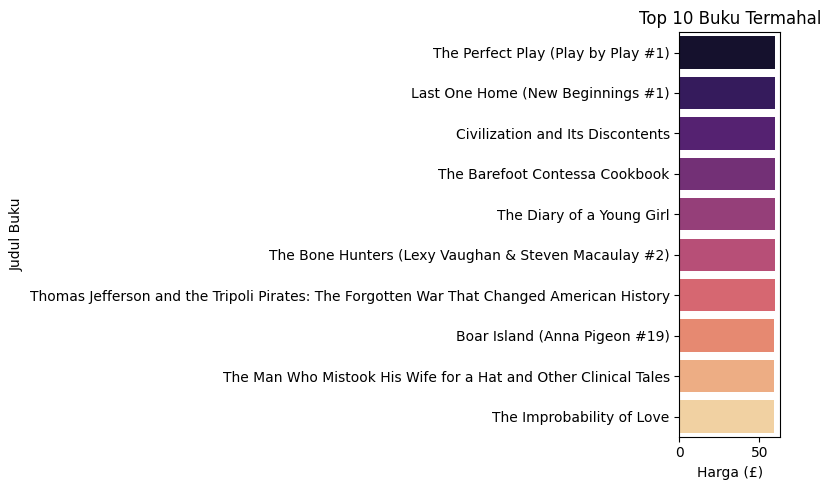

In [9]:
# b. 10 buku dengan harga tertinggi
top10 = df.sort_values("price", ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y="title", x="price", data=top10, palette="magma")
plt.title("Top 10 Buku Termahal")
plt.xlabel("Harga (£)")
plt.ylabel("Judul Buku")
plt.tight_layout()
plt.savefig("top10_prices.png")
plt.show()